# T>C percentage (=labeled fraction) 
# Half life

In [1]:
# notebook cleaned 2021/03/02
# avg.tc.pct is the mean percentage of TC labeled miRNAs

In [1]:
library(tidyverse)
library(ggplot2)
library(gplots)
library(cowplot)

library(broom)
library(minpack.lm)
library(nlsr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
options(stringsAsFactors = FALSE)
rm(list = ls())

In [3]:
col_shgfp <- "gray30"
col_sh6 <- '#FDAE61'
col_sh11 <- '#3288BD'

In [5]:
# look at same 126 miRNAs as in sh11 s4U
# also deposited in github Shiekhattarlab/miRNApaper/s4U_figures/126_final_miRNA_analyzed_inputReadsNorm.txt 

toMatch <- read.delim("126_final_miRNA_analyzed_inputReadsNorm.txt")
head(toMatch)

toMatch <- toMatch$V1
head(toMatch)



,V1
,<chr>
1,miR-25-3p
2,let-7i-5p
3,let-7d-5p
4,miR-93-5p
5,miR-191-5p
6,miR-17-5p


[1] "miR-25-3p"  "let-7i-5p"  "let-7d-5p"  "miR-93-5p"  "miR-191-5p"
[6] "miR-17-5p"

# compare merged GFP samples with shINTS6 and shINTS11 

In [7]:
norm.method <- "normed_rpm_inputReads"

In [8]:
# files deposited in GEO: accession number GSE178127
timecourse.gfp <- read.delim("/timecourse_merge_gfp_for_heatmap_accumulation_plot.tsv")
timecourse.6 <- read.delim("/timecourse_mergeRepl_sh6_for_heatmap_accumulation_plot.tsv")
timecourse.11 <- read.delim("/timecourse_sh11_for_heatmap_accumulation_plot.tsv")

In [11]:
timecourse.gfp.tc <-
    timecourse.gfp %>%
    mutate(sample = "shGFP") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

head(timecourse.gfp.tc)

timecourse.6.tc <-
    timecourse.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

head(timecourse.6.tc)


timecourse.11.tc <-
    timecourse.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("0.083", "flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

head(timecourse.11.tc)

,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shGFP,miR-25,miR-25-3p,0.04020073,0.04904787,0.04634413,0.05945324,0.1640061,0.3251269,0.7177033,1.409949
2,shGFP,let-7d,let-7d-5p,0.06275027,0.06037113,0.07538101,0.09195657,0.3042792,0.7514916,1.7334157,3.279117
3,shGFP,miR-191,miR-191-5p,0.20594966,0.15467904,0.19309161,0.23131852,0.4257164,0.5475803,0.9104820,1.127736
4,shGFP,miR-93,miR-93-5p,0.05482474,0.04800477,0.06089545,0.05656165,0.2400821,0.5992559,1.2232509,2.192040
5,shGFP,miR-17,miR-17-5p,0.04513552,0.04578509,0.05517541,0.05885986,0.2279122,0.5020231,1.0930922,1.746397
6,shGFP,miR-224,miR-224-5p,0.06556881,0.06666050,0.07191368,0.05619657,0.1878411,0.7648135,2.3692769,3.934396


,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS6,miR-25,miR-25-3p,0.06483847,0.04676919,0.05054414,0.07160863,0.14862744,0.22944786,0.6908589,0.9354773
2,shINTS6,miR-21,miR-21-5p,0.04125723,0.04530104,0.08182261,0.19033163,0.51588583,0.85495174,0.9860549,1.2283624
3,shINTS6,let-7i,let-7i-5p,0.06344202,0.04985344,0.05878919,0.06847571,0.22629057,0.40672289,0.7047852,1.3118786
4,shINTS6,let-7d,let-7d-5p,0.06558380,0.08078261,0.06786977,0.12320006,0.20733350,0.35962880,0.5874616,1.4818702
5,shINTS6,miR-191,miR-191-5p,0.10756544,0.21887825,0.19756153,0.30433344,0.31158358,0.42712226,0.6144129,0.7858674
6,shINTS6,miR-29a,miR-29a-3p,0.01065202,0.01890262,0.03176218,0.05389161,0.07909415,0.08491976,0.1461403,0.2402852


,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS11,miR-25,miR-25-3p,0.040904974,0.04368411,0.04543018,0.06810037,0.09424825,0.1188904,0.1857734,0.2412955
2,shINTS11,let-7i,let-7i-5p,0.018208511,0.03437886,0.06247283,0.09123242,0.22238376,0.3052932,0.2755538,0.3853481
3,shINTS11,let-7d,let-7d-5p,0.055402616,0.02184170,0.04905146,0.19974923,0.17338363,0.1876603,0.2675432,0.3017034
4,shINTS11,miR-17,miR-17-5p,0.006144016,0.06227891,0.06875285,0.03868971,0.08272978,0.1408353,0.1324742,0.1283415
5,shINTS11,miR-191,miR-191-5p,0.110987791,0.10400416,0.18988844,0.07220217,0.22145669,0.1421666,0.1773050,0.3252033
6,shINTS11,miR-21,miR-21-5p,0.033605942,0.02192623,0.05802992,0.22370641,0.38220005,0.4211959,0.4912592,0.3964191


In [12]:

time.gfp.tc <- as.data.frame(timecourse.gfp.tc[,-c(1,2)]) # remove sample name and miR duplex
time.gfp.tc <- time.gfp.tc[-grep("miR-106a-5p", time.gfp.tc$arm.name),] # remove both entries for miR-106a, its too weird
rownames(time.gfp.tc) <- time.gfp.tc$arm.name
time.gfp.tc <- as.matrix(time.gfp.tc[,-1]) # remove arm.name
time.gfp.tc <- (time.gfp.tc-time.gfp.tc[,1]) #normalize ppm by timepoint 0
time.gfp.tc[time.gfp.tc<0] <- 0
head(time.gfp.tc)
nrow(time.gfp.tc)


time.6.tc <- as.data.frame(timecourse.6.tc[,-c(1,2)])
time.6.tc <- time.6.tc[-grep("miR-106a-5p", time.6.tc$arm.name),] # remove both entries for miR-106a, its too weird
rownames(time.6.tc) <- time.6.tc$arm.name
time.6.tc <- as.matrix(time.6.tc[,-1])
time.6.tc <- (time.6.tc-time.6.tc[,1])
time.6.tc[time.6.tc<0] <- 0
head(time.6.tc)
nrow(time.6.tc)


time.11.tc <- as.data.frame(timecourse.11.tc[,-c(1,2)])
rownames(time.11.tc) <- time.11.tc$arm.name
time.11.tc <- as.matrix(time.11.tc[,-1])
time.11.tc <- (time.11.tc-time.11.tc[,1])
time.11.tc[time.11.tc<0] <- 0
head(time.11.tc)
nrow(time.11.tc)



,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.0088471352,0.006143402,0.019252508,0.1238054,0.2849262,0.6775026,1.3697479
let-7d-5p,0,0.0000000000,0.012630741,0.029206299,0.2415289,0.6887413,1.6706654,3.2163666
miR-191-5p,0,0.0000000000,0.000000000,0.025368859,0.2197668,0.3416306,0.7045324,0.9217868
miR-93-5p,0,0.0000000000,0.006070714,0.001736908,0.1852574,0.5444311,1.1684262,2.1372149
miR-17-5p,0,0.0006495683,0.010039891,0.013724346,0.1827767,0.4568876,1.0479567,1.7012611
miR-224-5p,0,0.0010916831,0.006344863,0.000000000,0.1222723,0.6992447,2.3037081,3.8688276


[1] 194

,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.000000000,0.000000000,0.006770163,0.08378897,0.16460939,0.6260204,0.8706388
miR-21-5p,0,0.004043816,0.040565383,0.149074401,0.47462860,0.81369451,0.9447977,1.1871052
let-7i-5p,0,0.000000000,0.000000000,0.005033687,0.16284855,0.34328087,0.6413431,1.2484366
let-7d-5p,0,0.015198803,0.002285968,0.057616257,0.14174969,0.29404499,0.5218778,1.4162864
miR-191-5p,0,0.111312813,0.089996091,0.196768008,0.20401814,0.31955683,0.5068474,0.6783019
miR-29a-3p,0,0.008250598,0.021110157,0.043239591,0.06844213,0.07426774,0.1354883,0.2296332


[1] 193

,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.002779137,0.004525202,0.02719539,0.05334328,0.07798544,0.14486839,0.2003905
let-7i-5p,0,0.016170350,0.044264318,0.07302391,0.20417525,0.28708465,0.25734524,0.3671396
let-7d-5p,0,0.000000000,0.000000000,0.14434662,0.11798101,0.13225772,0.21214062,0.2463008
miR-17-5p,0,0.056134898,0.062608838,0.03254569,0.07658577,0.13469125,0.12633016,0.1221975
miR-191-5p,0,0.000000000,0.078900649,0.00000000,0.11046890,0.03117883,0.06631717,0.2142155
miR-21-5p,0,0.000000000,0.024423980,0.19010046,0.34859411,0.38758995,0.45765322,0.3628132


[1] 127

In [13]:
head(toMatch)
length(toMatch)

[1] "miR-25-3p"  "let-7i-5p"  "let-7d-5p"  "miR-93-5p"  "miR-191-5p"
[6] "miR-17-5p"

[1] 126

In [14]:
# normalize to 24h timepoint - COMPARED TO shCONTROL

# _________________________________________________________________

time.gfp.tc <- time.gfp.tc[grepl(paste0(toMatch, collapse = "|"),rownames(time.gfp.tc)),-1] 
fract.gfp.tc <- time.gfp.tc/time.gfp.tc[,7]
fract.gfp.tc[is.nan(fract.gfp.tc)] <- NA 
fract.gfp.tc[is.infinite(fract.gfp.tc)] <- NA 
head(fract.gfp.tc)

time.6.tc <- time.6.tc[match(rownames(time.gfp.tc), rownames(time.6.tc)),-1]
fract.6.tc <- time.6.tc/time.gfp.tc[,7]
fract.6.tc[is.nan(fract.6.tc)] <- NA
fract.6.tc[is.infinite(fract.6.tc)] <- NA
fract.6.tc <- fract.6.tc[complete.cases(fract.6.tc),] 
head(fract.6.tc)

time.11.tc <- time.11.tc[match(rownames(time.gfp.tc), rownames(time.11.tc)),-1]
fract.11.tc <- time.11.tc/time.gfp.tc[,7]
fract.11.tc[is.nan(fract.11.tc)] <- NA
fract.11.tc[is.infinite(fract.11.tc)] <- NA
fract.11.tc <- fract.11.tc[complete.cases(fract.11.tc),] 
head(fract.11.tc)


# time.gfp.tc --> same miRNA as 11
fract.gfp.tc <- fract.gfp.tc[match(rownames(fract.11.tc), rownames(fract.gfp.tc)),] 
fract.6.tc <- fract.6.tc[match(rownames(fract.11.tc), rownames(fract.6.tc)),] 

time.gfp.tc <- fract.gfp.tc
time.6.tc <- fract.6.tc
time.11.tc <- fract.11.tc

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.0064589515,0.004485061,0.0140555123,0.09038553,0.2080136,0.4946184,1
let-7d-5p,0.0000000000,0.003927022,0.0090805255,0.07509371,0.2141364,0.5194263,1
miR-191-5p,0.0000000000,0.000000000,0.0275213963,0.23841389,0.3706179,0.7643117,1
miR-93-5p,0.0000000000,0.002840479,0.0008126968,0.08668169,0.2547386,0.5467050,1
miR-17-5p,0.0003818157,0.005901440,0.0080671605,0.10743602,0.2685582,0.6159882,1
miR-224-5p,0.0002821741,0.001639996,0.0000000000,0.03160448,0.1807381,0.5954538,1


,0.25,0.5,1,3,6,12,24
miR-25-3p,0.000000000,0.0000000000,0.004942635,0.06117109,0.12017495,0.4570333,0.6356197
let-7d-5p,0.004725457,0.0007107300,0.017913461,0.04407137,0.09142148,0.1622569,0.4403374
miR-191-5p,0.120757661,0.0976322229,0.213463695,0.22132900,0.34667110,0.5498532,0.7358556
miR-93-5p,0.000000000,0.0000000000,0.017513224,0.07598851,0.14108899,0.3429392,0.7521972
miR-17-5p,0.026697392,0.0000000000,0.019474205,0.08440258,0.13684402,0.2343466,0.4493455
miR-224-5p,0.000000000,0.0003942633,0.003532158,0.06538736,0.18789681,0.3544799,0.7089067


,0.25,0.5,1,3,6,12,24
miR-25-3p,0.002028941,0.003303675,0.01985431,0.03894387,0.05693416,0.10576281,0.14629736
let-7d-5p,0.000000000,0.000000000,0.04487878,0.03668146,0.04112023,0.06595661,0.07657733
miR-191-5p,0.000000000,0.085595338,0.00000000,0.11984214,0.03382434,0.07194416,0.23239156
miR-93-5p,0.005869890,0.077614414,0.09090099,0.10000319,0.13886139,0.17473176,0.19565751
miR-17-5p,0.032996051,0.036801429,0.01913033,0.04501706,0.07917142,0.07425677,0.07182757
miR-224-5p,0.004031032,0.000000000,0.00000000,0.01154685,0.04408227,0.07680241,0.06416683


In [16]:
# optional:
# write TC conversions to calculate half life in PRISM
g <- t(time.gfp.tc)
#write.table(g, file = "126_miRNA_TCpct_forPrism_shControl_.csv"), sep="\t", row.names=TRUE, col.names=TRUE, quote=FALSE)

e <- t(time.6.tc)
#write.table(e, file = "126_miRNA_TCpct_forPrism_shINTS6_.csv"), sep="\t", row.names=TRUE, col.names=TRUE, quote=FALSE)

i <- t(time.11.tc)
#write.table(i, file = "126_miRNA_TCpct_forPrism_shINTS11_.csv"), sep="\t", row.names=TRUE, col.names=TRUE, quote=FALSE)



# Heatmap T>C conversion rates [%]

In [ ]:
# not used in paper

In [17]:
breaks=c(seq(from=0, to=1, by=0.01))


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

[1] 101

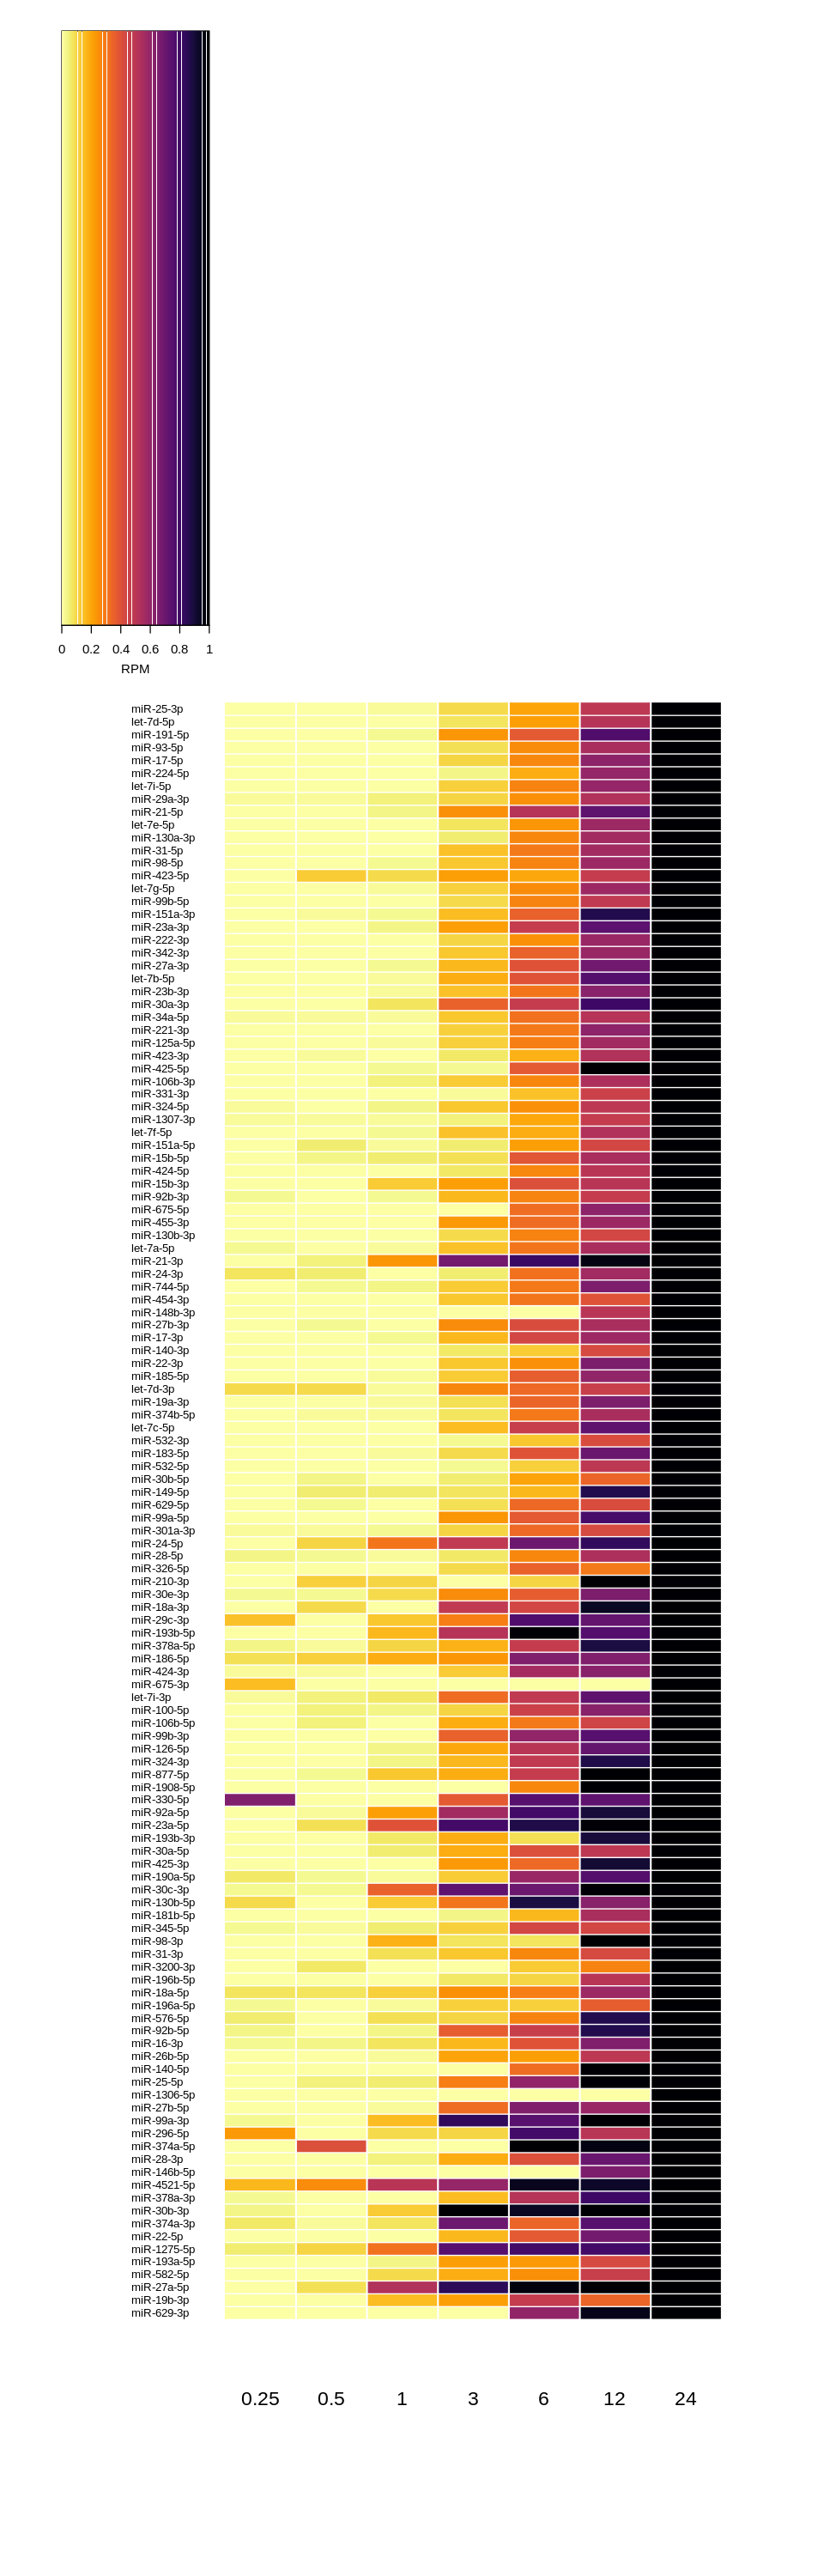

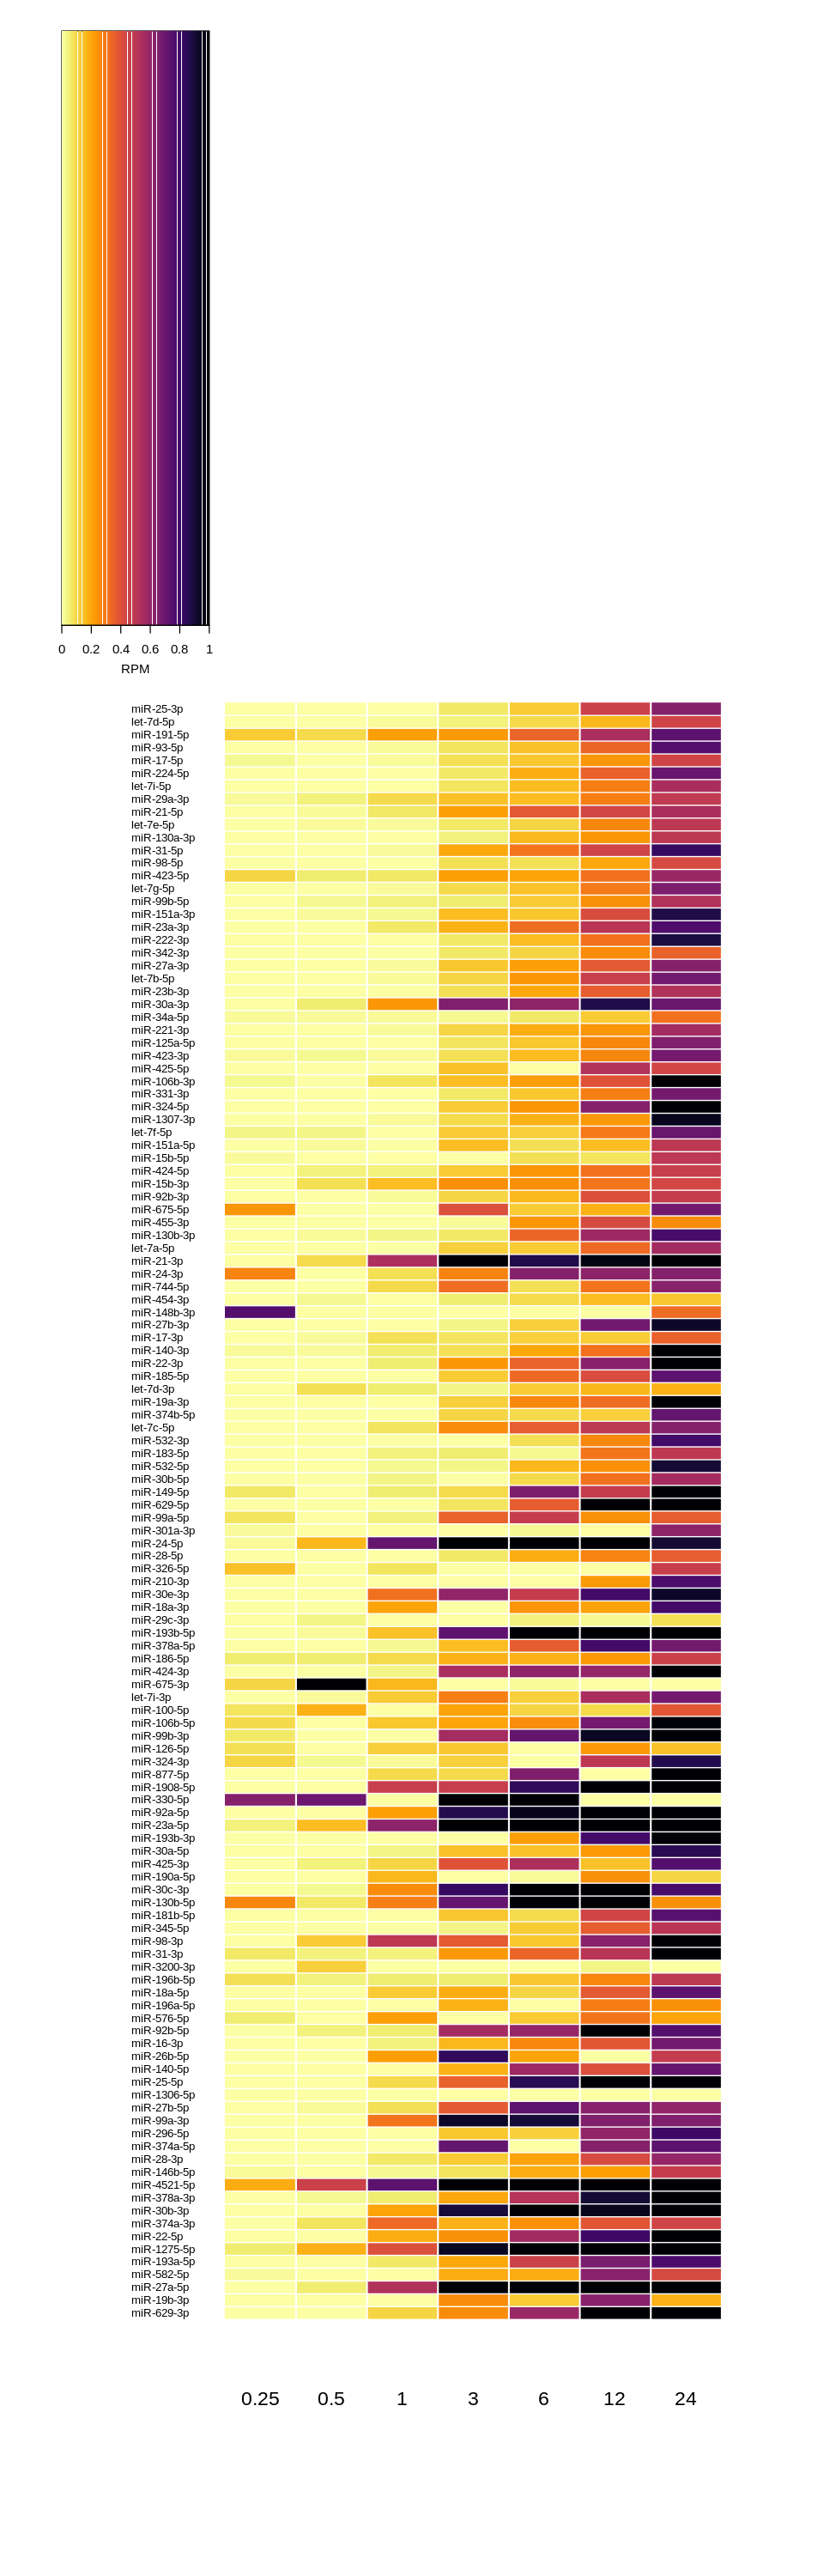

In [18]:

#pdf(file = "figures_mergeRepl/heatmap_timecourse_shControl_TClabeledFract_126miRNA_rpmInputReads.pdf", width = 8, height = 25)

options(repr.plot.width=8, repr.plot.height=25)
heatmap.2(time.gfp.tc, Colv=FALSE, offsetRow=-35, 
         margins = c(15,6), cexRow=0.8,srtCol=0, adjCol = c(0.5,0),
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "none",
         key.xlab="RPM", key.title="",
         colsep=1:nrow(time.gfp.tc), rowsep=1:nrow(time.gfp.tc), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         col = c(viridis::inferno(length(breaks)-1, direction=-1)), breaks = breaks)
#dev.off()

#pdf(file = "figures_mergeRepl/heatmap_timecourse_shINTS6_TClabeledFract_126miRNA_rpmInputReads.pdf", width = 8, height = 25)
heatmap.2(time.6.tc, Colv=FALSE, offsetRow=-35, 
         margins = c(15,6), cexRow=0.8,srtCol=0, adjCol = c(0.5,0),
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "none",
         key.xlab="RPM", key.title="",
         colsep=1:nrow(time.6.tc), rowsep=1:nrow(time.6.tc), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         col = c(viridis::inferno(length(breaks)-1, direction=-1)), breaks = breaks)
#dev.off()


# Timecourse plot

In [ ]:
# Figure 3i in paper

In [20]:
##library(data.table)
head(time.gfp.tc)
gfp <- reshape2::melt(time.gfp.tc)
gfp$hela <- "shControl"
colnames(gfp) <- c("arm.name", "time", "%", "hela")
gfp$arm.name <- as.character(gfp$arm.name)
head(gfp)
nrow(gfp)

ints6 <- reshape2::melt(time.6.tc)
ints6$hela <- "shINTS6"
colnames(ints6) <- c("arm.name", "time", "%", "hela")
ints6$arm.name <- as.character(ints6$arm.name)
head(ints6)
nrow(ints6)

ints11 <- reshape2::melt(time.11.tc)
ints11$hela <- "shINTS11"
colnames(ints11) <- c("arm.name", "time", "%", "hela")
ints11$arm.name <- as.character(ints11$arm.name)
head(ints11)
nrow(ints11)

fin <- rbind.data.frame(gfp, ints6, ints11)

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.0064589515,0.004485061,0.0140555123,0.09038553,0.2080136,0.4946184,1
let-7d-5p,0.0000000000,0.003927022,0.0090805255,0.07509371,0.2141364,0.5194263,1
miR-191-5p,0.0000000000,0.000000000,0.0275213963,0.23841389,0.3706179,0.7643117,1
miR-93-5p,0.0000000000,0.002840479,0.0008126968,0.08668169,0.2547386,0.5467050,1
miR-17-5p,0.0003818157,0.005901440,0.0080671605,0.10743602,0.2685582,0.6159882,1
miR-224-5p,0.0002821741,0.001639996,0.0000000000,0.03160448,0.1807381,0.5954538,1


,arm.name,time,%,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.0064589515,shControl
2,let-7d-5p,0.25,0.0000000000,shControl
3,miR-191-5p,0.25,0.0000000000,shControl
4,miR-93-5p,0.25,0.0000000000,shControl
5,miR-17-5p,0.25,0.0003818157,shControl
6,miR-224-5p,0.25,0.0002821741,shControl


[1] 882

,arm.name,time,%,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.000000000,shINTS6
2,let-7d-5p,0.25,0.004725457,shINTS6
3,miR-191-5p,0.25,0.120757661,shINTS6
4,miR-93-5p,0.25,0.000000000,shINTS6
5,miR-17-5p,0.25,0.026697392,shINTS6
6,miR-224-5p,0.25,0.000000000,shINTS6


[1] 882

,arm.name,time,%,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.002028941,shINTS11
2,let-7d-5p,0.25,0.000000000,shINTS11
3,miR-191-5p,0.25,0.000000000,shINTS11
4,miR-93-5p,0.25,0.005869890,shINTS11
5,miR-17-5p,0.25,0.032996051,shINTS11
6,miR-224-5p,0.25,0.004031032,shINTS11


[1] 882

In [22]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
##   http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)/#Helper functions
##   
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=TRUE,
                      conf.interval=.95, .drop=TRUE) {
        library(plyr)
        
        # New version of length which can handle NA's: if na.rm==T, don't count them
        length2 <- function (x, na.rm=FALSE) {
                if (na.rm) sum(!is.na(x))
                else       length(x)
        }
        
        # This does the summary. For each group's data frame, return a vector with
        # N, mean, and sd
        datac <- ddply(data, groupvars, .drop=.drop,
                       .fun = function(xx, col) {
                               c(N    = length2(xx[[col]], na.rm=na.rm),
                                 mean = mean   (xx[[col]], na.rm=na.rm),
                                median = median(xx[[col]], na.rm=na.rm),
                                 sd   = sd     (xx[[col]], na.rm=na.rm)
                               )
                       },
                       measurevar
        )
        
        # Rename the "mean" column    
        datac <- rename(datac, c("mean" = measurevar)) # original code
        #datac <- rename(datac, c("median" = measurevar))
        
        datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
        
        # Confidence interval multiplier for standard error
        # Calculate t-statistic for confidence interval: 
        # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
        ciMult <- qt(conf.interval/2 + .5, datac$N-1)
        datac$ci <- datac$se * ciMult
        
        return(datac)
}



------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


`geom_smooth()` using method = 'loess'



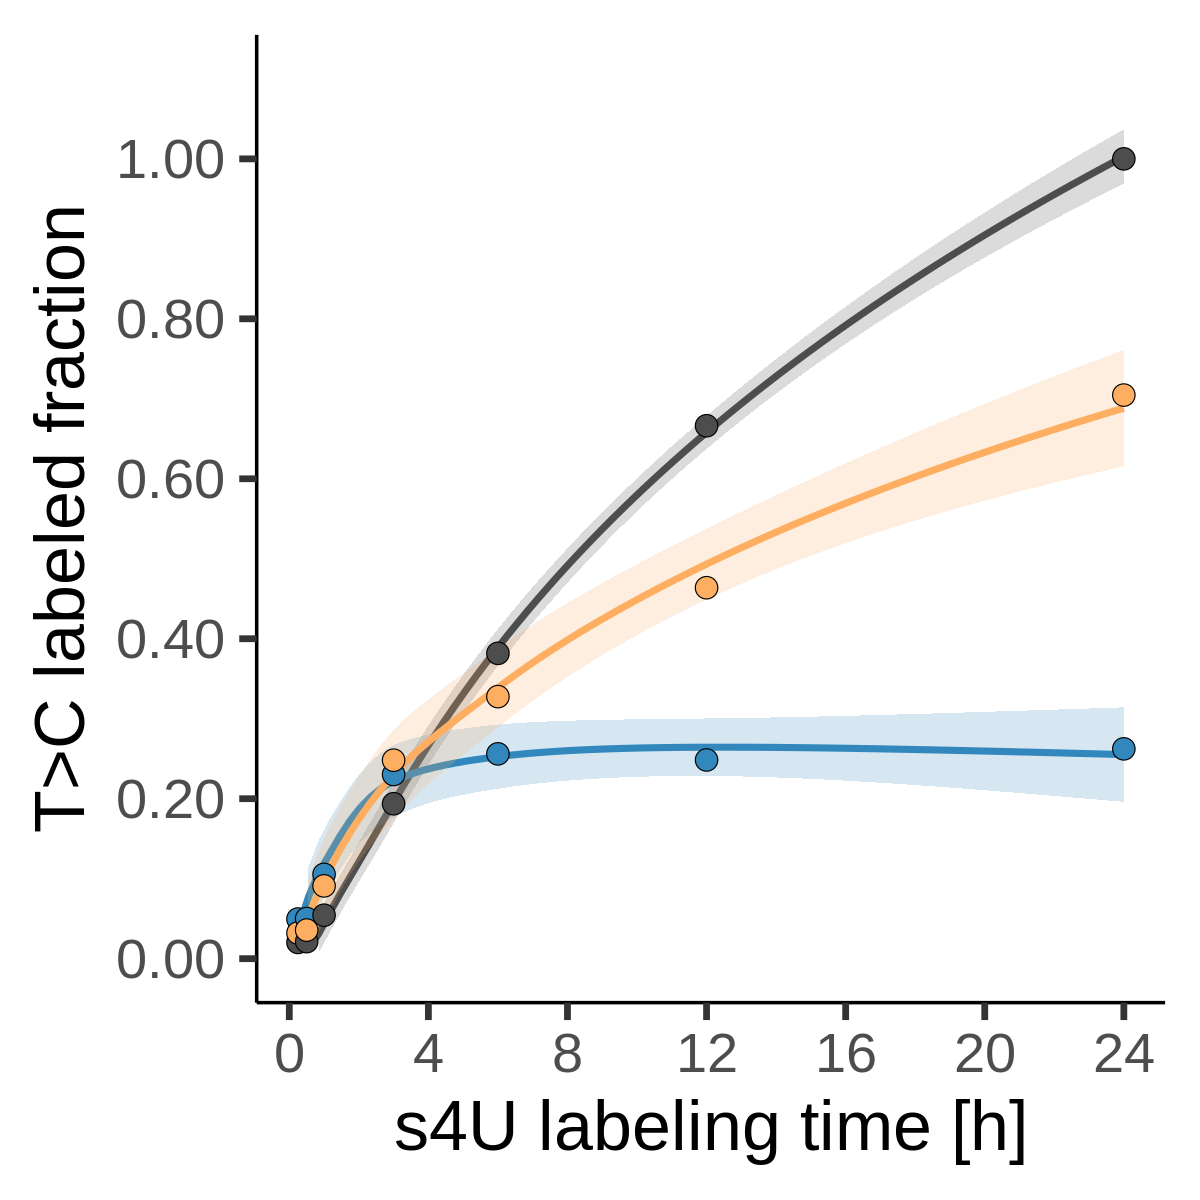

In [23]:
test <- summarySE(fin, measurevar="%", groupvars=c("time","hela"))


y <- ggplot(data = test, aes(x = time, y=`%`, fill=hela, group=hela)) +
        theme_bw(base_size = 42) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position="none", #c(0.25, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(breaks =c(0,4,8,12,16,20,24), 
                           label=c("0","4","8","12","16","20","24"))+
        scale_y_continuous(limits=c(0,1.1), breaks =c(0, 0.2, 0.4, 0.6, 0.8, 1), labels=c("0.00", "0.20", "0.40", "0.60", "0.80", "1.00"))+#, trans = 'log10')+
        xlab("s4U labeling time [h]")+
        ylab("T>C labeled fraction")+
        scale_color_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        scale_fill_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        #annotate("rect", xmin = 1, xmax = 3, ymin = -Inf, ymax = Inf, alpha = .2) +
        #geom_line(size=1, lty=1)+
        #geom_errorbar(width=.15, aes(ymin=`%`-se, ymax=`%`+se)) +
        geom_smooth(aes(col=hela), method=NULL, formula='y ~ log(x)',se=TRUE, span=1, size=2, alpha=0.2) + #linetype="longdash",
        geom_point(pch=21, lwd=6) 

options(repr.plot.width=10, repr.plot.height=10)
y
        

# guide vs. passenger miRNA

In [ ]:
# not used in paper

In [33]:
# only look at the 64 mature and star mirs:
# provided in github Shiekhattarlab/miRNApaper/s4U_figures/32_miRNA_couples_toAnalyze.txt
mi <- unique(read.delim("32_miRNA_couples_toAnalyze.txt", header=F))
colnames(mi) <- c("arm.name", "star")

In [34]:
# plot shControl vs shINTS6 with only 64 miRNA
fin.selection <- fin[grepl(paste0(mi$arm.name, collapse = "|"),fin$arm.name),]
head(fin.selection)

,arm.name,time,%,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.0064589515,shControl
2,let-7d-5p,0.25,0.0000000000,shControl
5,miR-17-5p,0.25,0.0003818157,shControl
7,let-7i-5p,0.25,0.0000000000,shControl
9,miR-21-5p,0.25,0.0053122910,shControl
12,miR-31-5p,0.25,0.0039299462,shControl


`geom_smooth()` using method = 'loess'



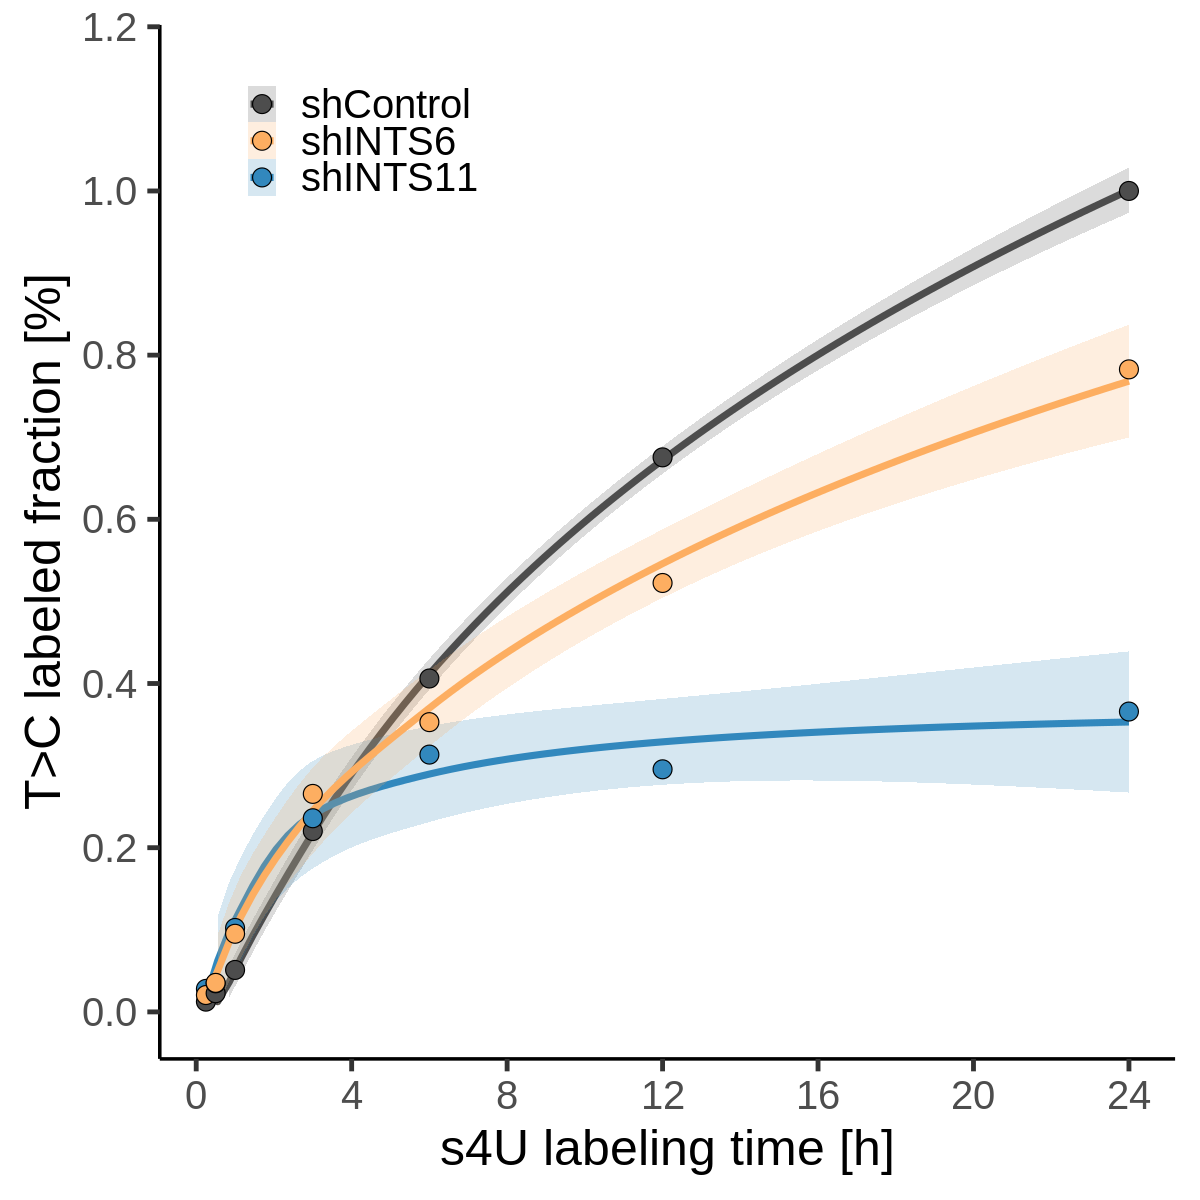

In [35]:
test.selection <- summarySE(fin.selection, measurevar="%", groupvars=c("time","hela"))


y <- ggplot(data = test.selection, aes(x = time, y=`%`, fill=hela, group=hela)) +
        theme_bw(base_size = 30) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.2, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(breaks =c(0,4,8,12,16,20,24), 
                           label=c("0","4","8","12","16","20","24"))+
        scale_y_continuous(limits=c(0,1.145), breaks =c(0, 0.2, 0.4, 0.6, 0.8, 1, 1.2))+#, trans = 'log10')+
        xlab("s4U labeling time [h]")+
        ylab("T>C labeled fraction [%]")+
        scale_color_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        scale_fill_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        #annotate("rect", xmin = 1, xmax = 3, ymin = -Inf, ymax = Inf, alpha = .2) +
        #geom_line(size=1, lty=1)+
        #geom_errorbar(width=.15, aes(ymin=`%`-se, ymax=`%`+se)) +
        geom_smooth(aes(col=hela), method=NULL, formula='y ~ log(x)', se=TRUE, span=1, size=2, alpha=0.2) + #linetype="longdash",
        geom_point(pch=21, lwd=5) 

options(repr.plot.width=10, repr.plot.height=10)
y
        

In [38]:
# define mature/ star couples
fin.star <- merge(fin.selection, mi, by="arm.name")
head(fin.star)

,arm.name,time,%,hela,star
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,let-7d-3p,3.00,0.26612558,shControl,star
2,let-7d-3p,0.50,0.00000000,shINTS11,star
3,let-7d-3p,1.00,0.00000000,shINTS11,star
4,let-7d-3p,3.00,0.03658586,shINTS6,star
5,let-7d-3p,0.25,0.00000000,shINTS11,star
6,let-7d-3p,6.00,0.12918139,shINTS6,star


In [44]:
# plot shGFP and shINTS6 active vs shGFP shINTS6 star

act <- fin.star[grep("mature", fin.star$star),]
star <- fin.star[grep("star", fin.star$star),]

head(act) 
head(star)

,arm.name,time,%,hela,star
,<chr>,<dbl>,<dbl>,<chr>,<chr>
22,let-7d-5p,3.00,0.04407137,shINTS6,mature
23,let-7d-5p,0.25,0.00000000,shINTS11,mature
24,let-7d-5p,6.00,0.09142148,shINTS6,mature
25,let-7d-5p,1.00,0.04487878,shINTS11,mature
26,let-7d-5p,24.00,0.07657733,shINTS11,mature
27,let-7d-5p,12.00,0.51942631,shControl,mature


,arm.name,time,%,hela,star
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,let-7d-3p,3.00,0.26612558,shControl,star
2,let-7d-3p,0.50,0.00000000,shINTS11,star
3,let-7d-3p,1.00,0.00000000,shINTS11,star
4,let-7d-3p,3.00,0.03658586,shINTS6,star
5,let-7d-3p,0.25,0.00000000,shINTS11,star
6,let-7d-3p,6.00,0.12918139,shINTS6,star


`geom_smooth()` using method = 'loess'

Warning message:
“Removed 1 rows containing missing values (geom_smooth).”


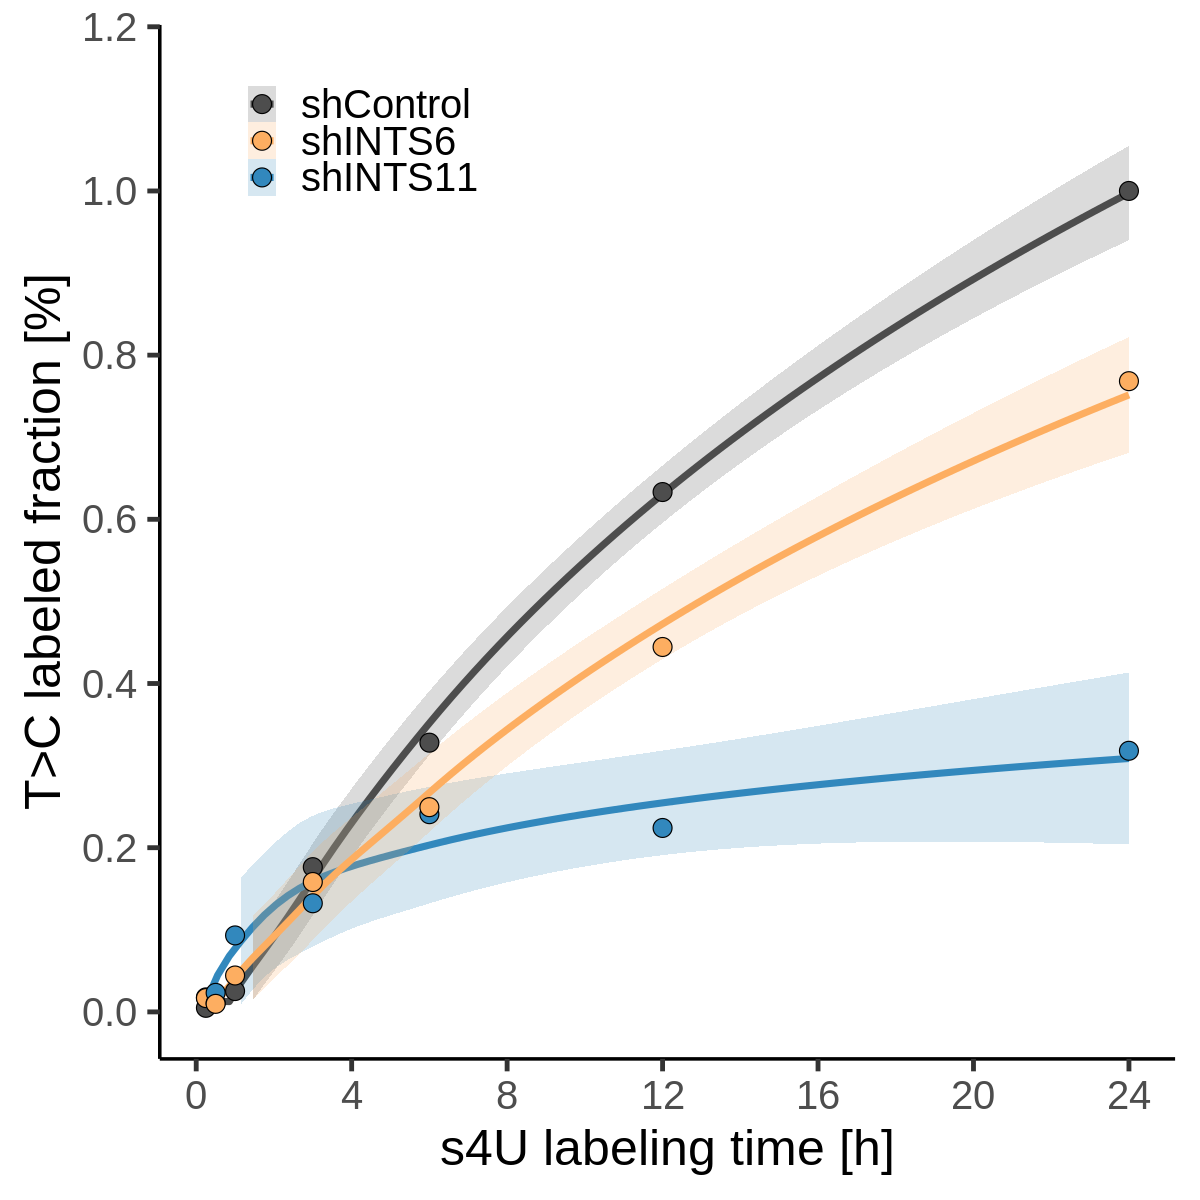

In [45]:
test.act <- summarySE(act, measurevar="%", groupvars=c("time","hela"))


y <- ggplot(data = test.act, aes(x = time, y=`%`, fill=hela, group=hela)) +
        theme_bw(base_size = 30) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.2, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(breaks =c(0,4,8,12,16,20,24), 
                           label=c("0","4","8","12","16","20","24"))+
        scale_y_continuous(limits=c(0,1.145), breaks =c(0, 0.2, 0.4, 0.6, 0.8, 1, 1.2))+#, trans = 'log10')+
        xlab("s4U labeling time [h]")+
        ylab("T>C labeled fraction [%]")+
        scale_color_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        scale_fill_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        #annotate("rect", xmin = 1, xmax = 3, ymin = -Inf, ymax = Inf, alpha = .2) +
        #geom_line(size=1, lty=1)+
        #geom_errorbar(width=.15, aes(ymin=`%`-se, ymax=`%`+se)) +
        geom_smooth(aes(col=hela), method=NULL, formula='y ~ log(x)', se=TRUE, span=1, size=2, alpha=0.2) + #linetype="longdash",
        geom_point(pch=21, lwd=5) 

options(repr.plot.width=10, repr.plot.height=10)
y
        

`geom_smooth()` using method = 'loess'



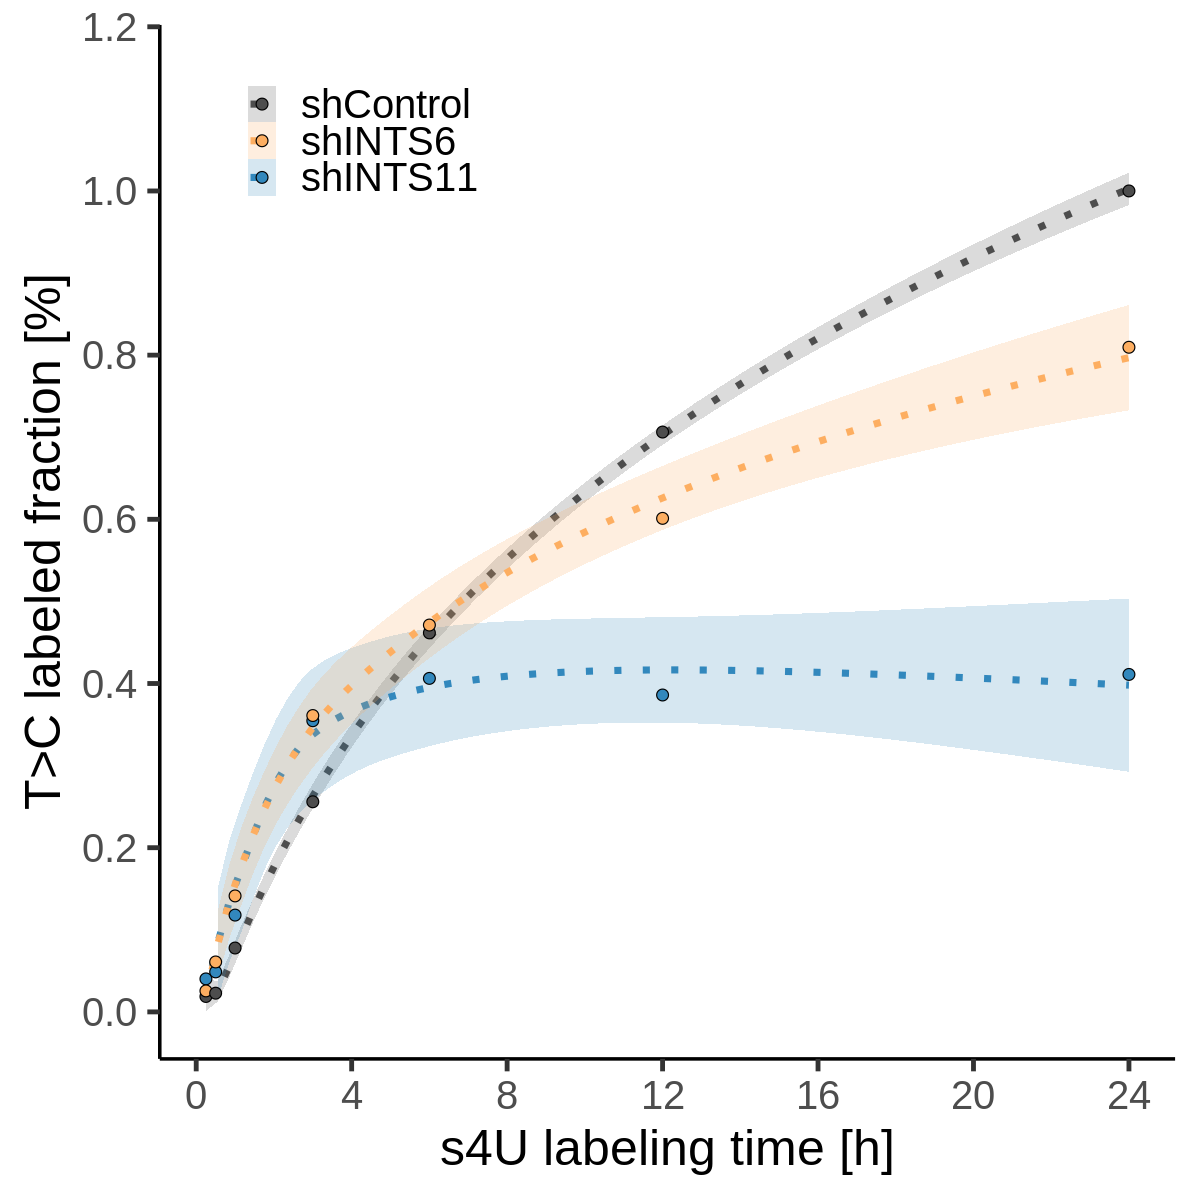

In [28]:
test.star <- summarySE(star, measurevar="%", groupvars=c("time","hela"))


y <- ggplot(data = test.star, aes(x = time, y=`%`, fill=hela, group=hela)) +
        theme_bw(base_size = 30) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.2, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(breaks =c(0,4,8,12,16,20,24), 
                           label=c("0","4","8","12","16","20","24"))+
        scale_y_continuous(limits=c(0,1.145), breaks =c(0, 0.2, 0.4, 0.6, 0.8, 1, 1.2))+#, trans = 'log10')+
        xlab("s4U labeling time [h]")+
        ylab("T>C labeled fraction [%]")+
        scale_color_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        scale_fill_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        #annotate("rect", xmin = 1, xmax = 3, ymin = -Inf, ymax = Inf, alpha = .2) +
        #geom_line(size=1, lty=1)+
        #geom_errorbar(width=.15, aes(ymin=`%`-se, ymax=`%`+se)) +
        geom_smooth(aes(col=hela), method=NULL, formula='y ~ log(x)', se=TRUE, span=1, size=2, alpha=0.2, linetype="dotted") + #linetype="longdash",
        geom_point(pch=21, lwd=3) 

options(repr.plot.width=10, repr.plot.height=10)
y
        